Интеллектуальный анализ данных с использованием методологии CRISP-DM.
Под Business Understanding в данном случае будем понимать потребность группы биологов автоматизировать процесс классификации ирисов по показателям.

# 1. Понимание данных. Data Understanding

### 1.1 Импортируйте библиотеку pandas:

In [1]:
import pandas as pd

### 1.2 Загрузите файл 

Загрузите файл формата .csv из Интеренета в переменную. URL, по которому доступен файл: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

Выведите на экран переменную, в которую на предыдущем шаге Вы загрузили файл

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Этот набор данных состоит из 3 различных типов ирисов (Setosa, Versicolour и Virginica) с длиной лепестков и чашелистиков.

Мы видим, что только один столбец имеет категориальные данные, а все остальные столбцы имеют числовой тип с ненулевыми записями.

Давайте получим краткую статистическую сводку по набору данных, используя функцию describe(). Функция describe() применяет базовые статистические вычисления к набору данных, такие как экстремальные значения, подсчет стандартного отклонения точек данных и т.д. Любое отсутствующее значение или значение NaN автоматически пропускается. Функция description() дает хорошее представление о распределении данных.

Функция автоматически распознает количественные и категориальные данные, и производит вычисление только с количественными данными

### 1.3 Примените функцию .describe()

Способ вызова функции:

название_переменной_в_которую_вы_загрузили_файл.describe()

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.4 Примените функцию .info()

Способ вызова функции:

название_переменнойвкоторую_вы_загрузили_файл.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 1.5 Отсутствующие значения

Проверим содержат ли наши данные отсутствующие значения. Такие значения могут возникать, когда информация не предоставлена/отсутствует для одного или нескольких элементов. 

Отсутствующие значения часто встречаются в реальных наборах данных. Недостающие данные нельзя игнорировать, поскольку это может привести к недостаточной точности статистического анализа. В противном случае они могут повлиять на наш анализ и решения, которые мы принимаем.

Используем для этого метод isnull().

In [6]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

В данном случае нет отсутствующих значений, что положительно, но крайне редко встречается на практике. Если бы такое было, то уже на этапе 2 нужно было бы принять решение, что делать:
1) заполнить недостающие значения среднем значением/иным способом

2) удалить всю строку с недостающим значением

### 1.6 Проверка дубликатов

In [8]:
#Возвращает на каждую строку датафрейма проверку - дубликат или нет
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
#Число всех дубликатов
df.duplicated().sum()

1

In [10]:
#Найти дубликаты
duplicate = df[df.duplicated()]
duplicate

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [11]:
df[(df['sepal_length'] == 5.8) & (df['sepal_width'] == 2.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,versicolor
82,5.8,2.7,3.9,1.2,versicolor
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


Дубликаты найдены, должны быть удалены на этапе 2

### 1.7 Матрица корреляции

В статистике нас часто интересует понимание взаимосвязи между двумя переменными. Такую зависимость можно проследить через матрицу корреляции.

Матрица корреляции — это квадратная таблица, которая показывает коэффициенты корреляции Пирсона между различными переменными в наборе данных.

Коэффициент корреляции Пирсона — это мера линейной связи между двумя переменными . Он принимает значение от -1 до 1, где:

-1 указывает на совершенно отрицательную линейную корреляцию между двумя переменными

0 указывает на отсутствие линейной корреляции между двумя переменными

1 указывает на совершенно положительную линейную корреляцию между двумя переменными.

Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными.

Это позволяет понять, какие переменные/данные наибольшим образом повлияют на будущую модель.

In [15]:
#Seaborn — это библиотека визуализации данных Python
#Он предоставляет высокоуровневый интерфейс для рисования привлекательных и информативных статистических графиков
import seaborn as sns

<Axes: >

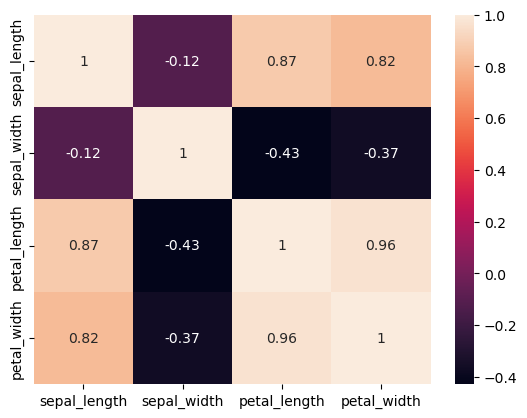

In [21]:
sns.heatmap(df.iloc[:, :-1].corr(method='pearson'),annot = True)

# 2. Подготовка данных. Data preparation

### 2.1 Удаление дубликатов

In [22]:
#Удаление дубликатов
df = df.drop_duplicates()

In [23]:
#Проверка, что дубликатов не осталось
df.duplicated().sum()

0

### 2.2 Трансформация категориальных данных в количественные

Задача классификации является одной из самых важных и распространенных задач при анализе занных и проведении предиктивной/прогнозной аналитики. Основная цель задачи классификации - разделение данных на классы в соответствии с заданными признаками. 


Есть различные способы, чтобы получить этот прогноз. Эти способы основаны на математике. Один из способов это:

логистическая регрессия — это алгоритм машинного обучения, который используется для решения задачи бинарной классификации, то есть разделения данных на два класса. Она использует логистическую функцию для прогнозирования вероятности принадлежности объекта к одному из классов. Она вычисляет вероятность того, что данное исходное значение принадлежит к определенному классу. 

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом. Scikit-learn предоставляет десятки встроенных алгоритмов и моделей машинного обучения: в том числе предназначенные для задач классификации, регрессионного (тип машинного обучения: с учителем) и кластерного анализа данных (тип машинного обучения: без учителя ), а также подготовка данных, выявление ошибок работы разработанной модели машинного обучения.

Импортируем эту библиотеку:

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

LabelEncoder - функция из библиотеки Scikit-learn, которая используется для преобразования категориальных данных в понятные для нашей разрабатываемой модели числовые данные. В наборе данных категорией является столбец species. 

Эта функция преобразует категории в числа из диапазона значений от "0" до "(число уникальных классов в наборе данных) - 1". В нашем случае - три вида цветков, т.е. 3 категории, т.е. столбцу species присвоятся значения от "0" до "(3) - 1"

In [26]:
df.loc[:, 'species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 3. Разработка модели машинного обучения. Modeling

### 3.1 Обучение с учителем. Задача классификации

Из библиотеки импортируем train_test_split, данная функция помогает автоматизаровать разделение набора данных и произвольным образом выбрать строки из набора данных (не по порядку).

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# обучение - 70
# тестирование - 30
Y = df['species']
X = df.drop(columns=['species'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

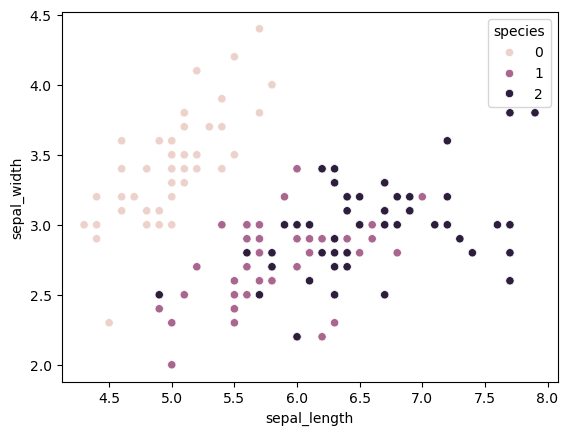

In [29]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df, )
  

Наилучшее соответствие — прямая линия на графике, которая минимизирует отклонение между связанными разрозненными точками данных.

Коэффициент, также известный как параметр, представляет собой коэффициент, на который умножается переменная. В линейной регрессии коэффициент представляет изменения в переменной отклика .

Коэффициент детерминации – коэффициент корреляции, обозначаемый как 𝑅². Используется для описания точности или степени соответствия регрессии.

Корреляция – взаимосвязь между двумя переменными с точки зрения измеримой силы и степени, часто называемая «степенью корреляции». Значения находятся в диапазоне от -1,0 до 1,0.

Зависимый признак – переменная, обозначенная как y в уравнении наклона y=ax+b. Также известен как Выход или Ответ.

Предполагаемая линия регрессии — прямая линия, которая лучше всего соответствует набору разбросанных точек данных.

Независимый признак – переменная, обозначенная как x в уравнении наклона y=ax+b. Также известен как вход или предиктор.

Пересечение – место, где наклон пересекает ось Y, обозначенную b в уравнении наклона y=ax+b.

Метод наименьших квадратов – метод оценки наилучшего соответствия данным путем минимизации суммы квадратов различий между наблюдаемыми и расчетными значениями.

Среднее — среднее значение набора чисел, но в линейной регрессии среднее моделируется линейной функцией.

Обычная регрессия наименьших квадратов (OLS) – более известная как линейная регрессия.

Невязка – расстояние по вертикали между точкой данных и линией регрессии .

Регрессия – оценка прогнозируемого изменения переменной по отношению к изменениям других переменных .

Модель регрессии – идеальная формула для аппроксимации регрессии.

Переменные отклика — включают в себя как прогнозируемый ответ (значение, предсказанное регрессией), так и фактический ответ, который представляет собой фактическое значение точки данных .

Наклон – крутизна линии регрессии. Наклон и точка пересечения могут использоваться для определения линейной зависимости между двумя переменными: y=ax+b.

Простая линейная регрессия – линейная регрессия, имеющая одну независимую переменную. 

In [30]:
# Логистическая регрессия 
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression()

In [31]:
# обучение модели
model_log_reg.fit(x_train, y_train)

LogisticRegression()

In [32]:
#Новый набор данных для проверки работоспособности модели, задаём признаки цветка
data = {'sepal_length': [5.0],'sepal_width':[3.6], 'petal_length':[1.4],'petal_width': [0.2]}

In [33]:
#Создадим новый набор данных вручную
new_df = pd.DataFrame()

In [34]:
#Экземпляр данных поместим в датафрейм
new_df = pd.DataFrame(data)

In [35]:
new_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2


In [36]:
#Предсказание результата - к какой категории принадлежит цветок с ранее заданными признаками. Примените модель к набору данных
predicted_with_lon_reg = model_log_reg.predict(new_df)

In [37]:
print(predicted_with_lon_reg)

[0]


In [38]:
#Ранее мы делили исходный набор данных на обучающуюся и тестовую выборки
#Мы можем тестовую выборку (x_test) подать на вход обученной модели model_log_reg и тогда получим классификацию для него
#Тестовая выборка выглядит так
print(x_test)

     sepal_length  sepal_width  petal_length  petal_width
17            5.1          3.5           1.4          0.3
95            5.7          3.0           4.2          1.2
78            6.0          2.9           4.5          1.5
137           6.4          3.1           5.5          1.8
56            6.3          3.3           4.7          1.6
148           6.2          3.4           5.4          2.3
42            4.4          3.2           1.3          0.2
70            5.9          3.2           4.8          1.8
57            4.9          2.4           3.3          1.0
104           6.5          3.0           5.8          2.2
125           7.2          3.2           6.0          1.8
129           7.2          3.0           5.8          1.6
68            6.2          2.2           4.5          1.5
134           6.1          2.6           5.6          1.4
114           5.8          2.8           5.1          2.4
146           6.3          2.5           5.0          1.9
49            

In [39]:
#Сопоставление категории для тестовой выборке выше по разработанной модели машинного обучения
print(model_log_reg.predict(x_test))

[0 1 1 2 1 2 0 2 1 2 2 2 1 2 2 2 0 2 1 0 0 0 0 2 1 2 0 2 0 0 1 1 2 0 1 2 1
 2 2 1 2 2 1 2 0]


In [40]:
#Фактическое значение категорий для тестовой выборки
print(y_test)

17     0
95     1
78     1
137    2
56     1
148    2
42     0
70     1
57     1
104    2
125    2
129    2
68     1
134    2
114    2
146    2
49     0
132    2
72     1
46     0
38     0
18     0
9      0
130    2
84     1
107    2
26     0
123    2
5      0
22     0
75     1
53     1
120    2
24     0
77     1
126    2
66     1
140    2
100    2
69     1
138    2
147    2
93     1
135    2
44     0
Name: species, dtype: int64


# 4. Оценка качества работы модели. Evaluation

In [41]:
# вывести метрику, показывающую точность
print("Точность: ",model_log_reg.score(x_test, y_test) * 100)

Точность:  97.77777777777777
